**Параллельная обработка изображений.**

**Упражнение 1 (7).** Существует много алгоритмов преобразования цветов в полутона серого: колориметрическое преобразование, кодирование яркости, отдельный канал и тому подобные. Скорее всего нам не придётся реализовывать их самостоятельно, поскольку библиотека OpenCV предоставляет некий метод в одну строку для преобразования обычного изображения в их аналоги полутонов серого. Найдите этот метод и примените к какому-либо изображению. В отчете вывести исходное и преобразованное изобржение.

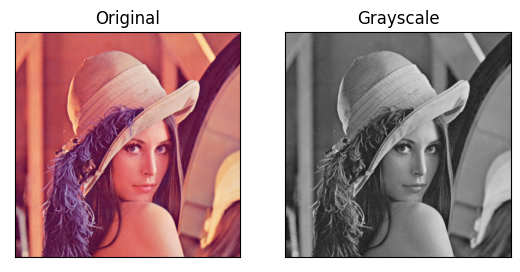

In [42]:
import cv2
from matplotlib import pyplot as plt

bgr = cv2.imread("./files/lenna.png")

gray_bgr = cv2.cvtColor(bgr, cv2.COLOR_RGB2GRAY)

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray_rgb = cv2.cvtColor(gray_bgr, cv2.COLOR_BGR2RGB)

captions_and_imgs = [("Original", rgb), ("Grayscale", gray_rgb)]

for i, (caption, img) in enumerate(captions_and_imgs):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(caption)
    plt.xticks([]), plt.yticks([])

plt.show()


**Упражнение 2 (7).** Другой важной технологией при обработке изображений является применение пороговых значений. Основная идея, стоящая за работой с пороговыми значениями, состоит в замене каждого пикселя в некотором изображении на белый пиксель если интенсивность данного пикселя выше чем предварительно заданное пороговое значение и на чёрный пиксель когда интенсивность этого пикселя меньше данного порогового значения. Библиотека OpenCV предоставляет некий метод в одну строку для такого преобразования. Найдите этот метод и примените к какому-либо изображению. В отчете вывести исходное и преобразованное изобржение.

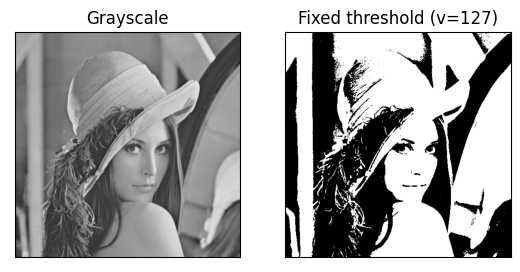

In [3]:
import cv2
from matplotlib import pyplot as plt

bgr = cv2.imread("./files/lenna.png", cv2.IMREAD_GRAYSCALE)

thresh = 127
maxval = 255

_, thr_bgr = cv2.threshold(bgr, thresh, maxval, cv2.THRESH_BINARY)

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
thr_rgb = cv2.cvtColor(thr_bgr, cv2.COLOR_BGR2RGB)

captions_and_imgs = [("Grayscale", rgb), (f"Fixed threshold (v={thresh})", thr_rgb)]

for i, (caption, img) in enumerate(captions_and_imgs):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(caption)
    plt.xticks([]), plt.yticks([])

plt.show()


**Упражнение 3 (8).** Мы можем видеть, что при простейшем пороговом значении, мы получаем некое изображение, которое выделяет отдельные области в нашем изображении. Тем не менее, остаётся целый ряд проблем того, что формулирует данный метод, причём наиболее общая состоит в том, какую именно константу выбрать для порогового значения. Поскольку различные изображения имеют разные цветовые тона, условия освещённости и так далее, нежелательно применять какое- то статическое значение для различных изображений в качестве их порогового значения.
Данная проблема разрешается различными адаптивными методами порогового значения, которые вычисляют текущее динамическое значение порога для небольших областей некоторого изображения. Данный процесс позволяет выравнивать необходимое пороговое значение для соответствующего подаваемого на вход изображения, а не зависит исключительно от некоторого статического значения.Библиотека OpenCV предоставляет некий метод в одну строку для такого преобразования. Найдите этот метод и примените к какому-либо изображению. В отчете вывести исходное и преобразованное изобржение.

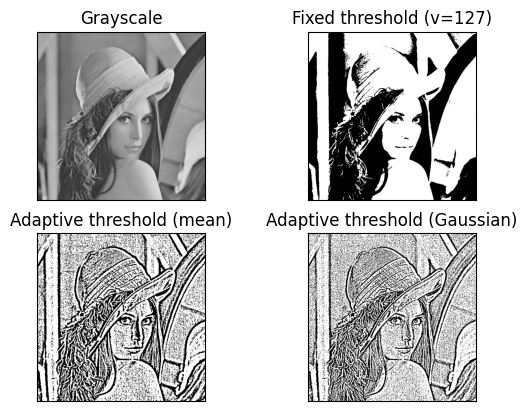

In [4]:
import cv2
from matplotlib import pyplot as plt

bgr = cv2.imread("./files/lenna.png", cv2.IMREAD_GRAYSCALE)

thresh = 127
maxval = 255

_, thr_bgr = cv2.threshold(bgr, thresh, maxval, cv2.THRESH_BINARY)

maxval = 255
block_size = 11
c = 2

thr_bgr_mean = cv2.adaptiveThreshold(
    bgr, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c
)
thr_bgr_gauss = cv2.adaptiveThreshold(
    bgr, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c
)

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
thr_rgb_mean = cv2.cvtColor(thr_bgr_mean, cv2.COLOR_BGR2RGB)
thr_rgb_gauss = cv2.cvtColor(thr_bgr_gauss, cv2.COLOR_BGR2RGB)

captions_and_imgs = [
    ("Grayscale", rgb),
    (f"Fixed threshold (v={thresh})", thr_rgb),
    ("Adaptive threshold (mean)", thr_rgb_mean),
    ("Adaptive threshold (Gaussian)", thr_rgb_gauss),
]

for i, (caption, img) in enumerate(captions_and_imgs):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(caption)
    plt.xticks([]), plt.yticks([])

plt.show()


**Упражнение 4 (8).** Возьмите видео-файл. Примените к каждому кадру фильтр серого. 

In [4]:
import os
import cv2
import numpy as np
from IPython.display import HTML


input_path = "./files/mob.mp4"
unfixed_path = "./files/mob-unfixed.mp4"
output_path = "./files/mob-gray.mp4"

fps = 23.98

try:
    cap = cv2.VideoCapture(input_path)

    ret, frame = cap.read()

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    height, width, _ = frame.shape

    out = cv2.VideoWriter(unfixed_path, fourcc, fps, (width, height), 0)

    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    out.write(frame)

    while(True):
        ret, frame = cap.read()

        if not ret:
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        out.write(frame)

except Exception as e:
    print(e)

finally:
    cap.release()
    out.release()

res = os.system(f"ffmpeg -y -hide_banner -loglevel error -i {unfixed_path} -vcodec libx264 {output_path}")

if res != 0:
    raise UserWarning(f"Could not convert video to H.264 (exit status {res})")

os.remove(unfixed_path)

content = "\n".join(f'<video src="{src}" controls></video>' for src in [input_path, output_path])
wrapper = f'<div style="display: flex; gap: 1em">{content}<div>'

HTML(wrapper)